In [170]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from scipy import sparse
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import warnings
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_log_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scipy.stats as st

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

warnings.filterwarnings("ignore")

In [3]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\rahul\Desktop\E-comm sale


## Loading Data ##

In [4]:
#C:\Users\rahul\Desktop\Novartis Challenge\Dataset
data = pd.read_csv('C:\\Users\\rahul\\Desktop\\E-comm sale\\Dataset\\Train.csv',encoding='utf-8')
data.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


## Exploratory Data Analysis ##

In [5]:
data.describe

<bound method NDFrame.describe of        Item_Id        Date  State_of_Country  Market_Category  \
0         IT_1  2007-07-05                 0                0   
1         IT_2  2007-07-05                 0                1   
2         IT_3  2007-07-05                 0              103   
3         IT_4  2007-07-05                 0              103   
4         IT_5  2007-07-05                 0              103   
...        ...         ...               ...              ...   
9793  IT_95425  2010-06-08                20              255   
9794  IT_95456  2010-06-08                 9               60   
9795  IT_95457  2010-06-08                21               37   
9796  IT_95472  2010-06-08                21              469   
9797  IT_95488  2010-06-09                 0                3   

      Product_Category  Grade  Demand  Low_Cap_Price  High_Cap_Price  
0                    0      0     0.5           2785            4240  
1                    0      0     0.7      

In [6]:
#Find unique values across each column
print (data.apply(lambda x: x.nunique()))

Item_Id             9798
Date                1070
State_of_Country      21
Market_Category      275
Product_Category      17
Grade                  4
Demand              1207
Low_Cap_Price       5392
High_Cap_Price      6468
dtype: int64


In [7]:
#Find number of NaN values in DF if its very small lets drop them else follow imputation techniques
print("The number of NaN values in the data is: ",len(data)-data.count())
print("The percentage of missing values is: {} % ".format(((len(data)-data.count()).sum()*100/len(data)).round(3)))

The number of NaN values in the data is:  Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64
The percentage of missing values is: 0.0 % 


## Skewness on Features ##

Check for skewness among variables as skewness can have higher effect on target variable in a regression problem!

In [50]:
#Find the skewness in data
print(data.columns[2:])
for i in data.columns[2:]:
    print("Feature " +i + " has skewness ",data[i].skew() )

Index(['State_of_Country', 'Market_Category', 'Product_Category', 'Grade',
       'Demand', 'Low_Cap_Price', 'High_Cap_Price'],
      dtype='object')
Feature State_of_Country has skewness  -0.7806057359992001
Feature Market_Category has skewness  0.47215763083085166
Feature Product_Category has skewness  1.5453037442825803
Feature Grade has skewness  1.1807470235812196
Feature Demand has skewness  43.79019310973429
Feature Low_Cap_Price has skewness  1.1767121517327326
Feature High_Cap_Price has skewness  1.6385116682326013


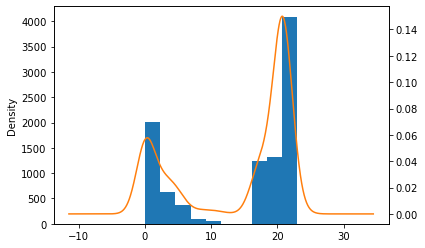

In [23]:
#Plot KDE on features 
ax = data.State_of_Country.plot(kind='hist')
data.State_of_Country.plot(kind='kde', ax=ax, secondary_y=True)

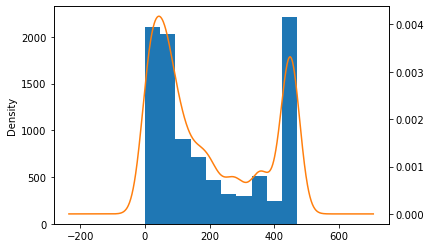

In [24]:
#Plot KDE on features 
ax = data.Market_Category.plot(kind='hist')
data.Market_Category.plot(kind='kde', ax=ax, secondary_y=True)

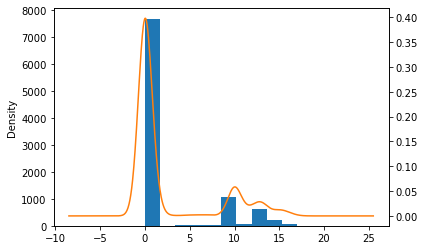

In [25]:
ax = data.Product_Category.plot(kind='hist')
data.Product_Category.plot(kind='kde', ax=ax, secondary_y=True)

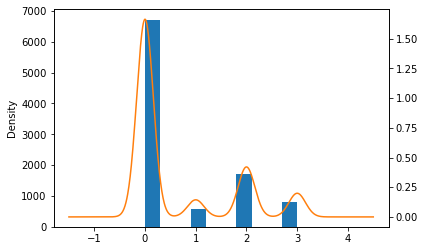

In [26]:
ax = data.Grade.plot(kind='hist')
data.Grade.plot(kind='kde', ax=ax, secondary_y=True)

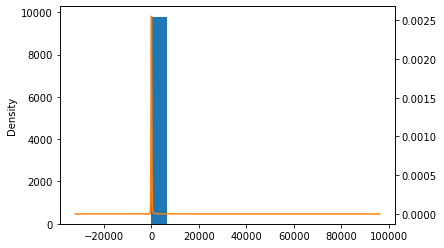

In [27]:
ax = data.Demand.plot(kind='hist')
data.Demand.plot(kind='kde', ax=ax, secondary_y=True)

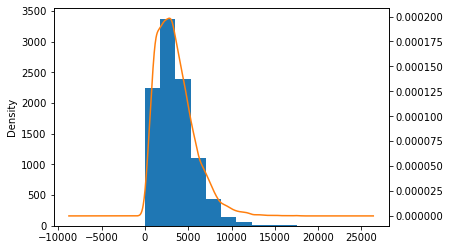

In [29]:
ax = data.Low_Cap_Price.plot(kind='hist')
data.Low_Cap_Price.plot(kind='kde', ax=ax, secondary_y=True)

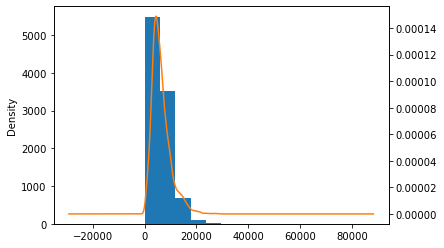

In [30]:
ax = data.High_Cap_Price.plot(kind='hist')
data.High_Cap_Price.plot(kind='kde', ax=ax, secondary_y=True)

In [44]:
# Check how values are distibuted in the variables or 
for i in data.columns[2:]:
    print("The distribution of values in ",i)
    print('*'*20)
    print(data[i].value_counts())
    print('=='*60)

The distribution of values in  State_of_Country
********************
21    3921
0     1563
20    1300
17     750
3      508
18     497
1      392
5      350
23     138
4      114
2       49
11      45
9       41
8       38
22      32
6       17
10      17
7       12
19      10
13       2
14       2
Name: State_of_Country, dtype: int64
The distribution of values in  Market_Category
********************
23     495
452    476
358    431
55     399
58     373
      ... 
193      1
31       1
148      1
178      1
18       1
Name: Market_Category, Length: 275, dtype: int64
The distribution of values in  Product_Category
********************
0     7167
10    1050
1      524
13     408
12     204
15     168
16      79
11      62
14      43
7       30
5       23
6       18
3        9
4        5
17       4
9        2
8        2
Name: Product_Category, dtype: int64
The distribution of values in  Grade
********************
0    6715
2    1698
3     804
1     581
Name: Grade, dtype: int64
The dist

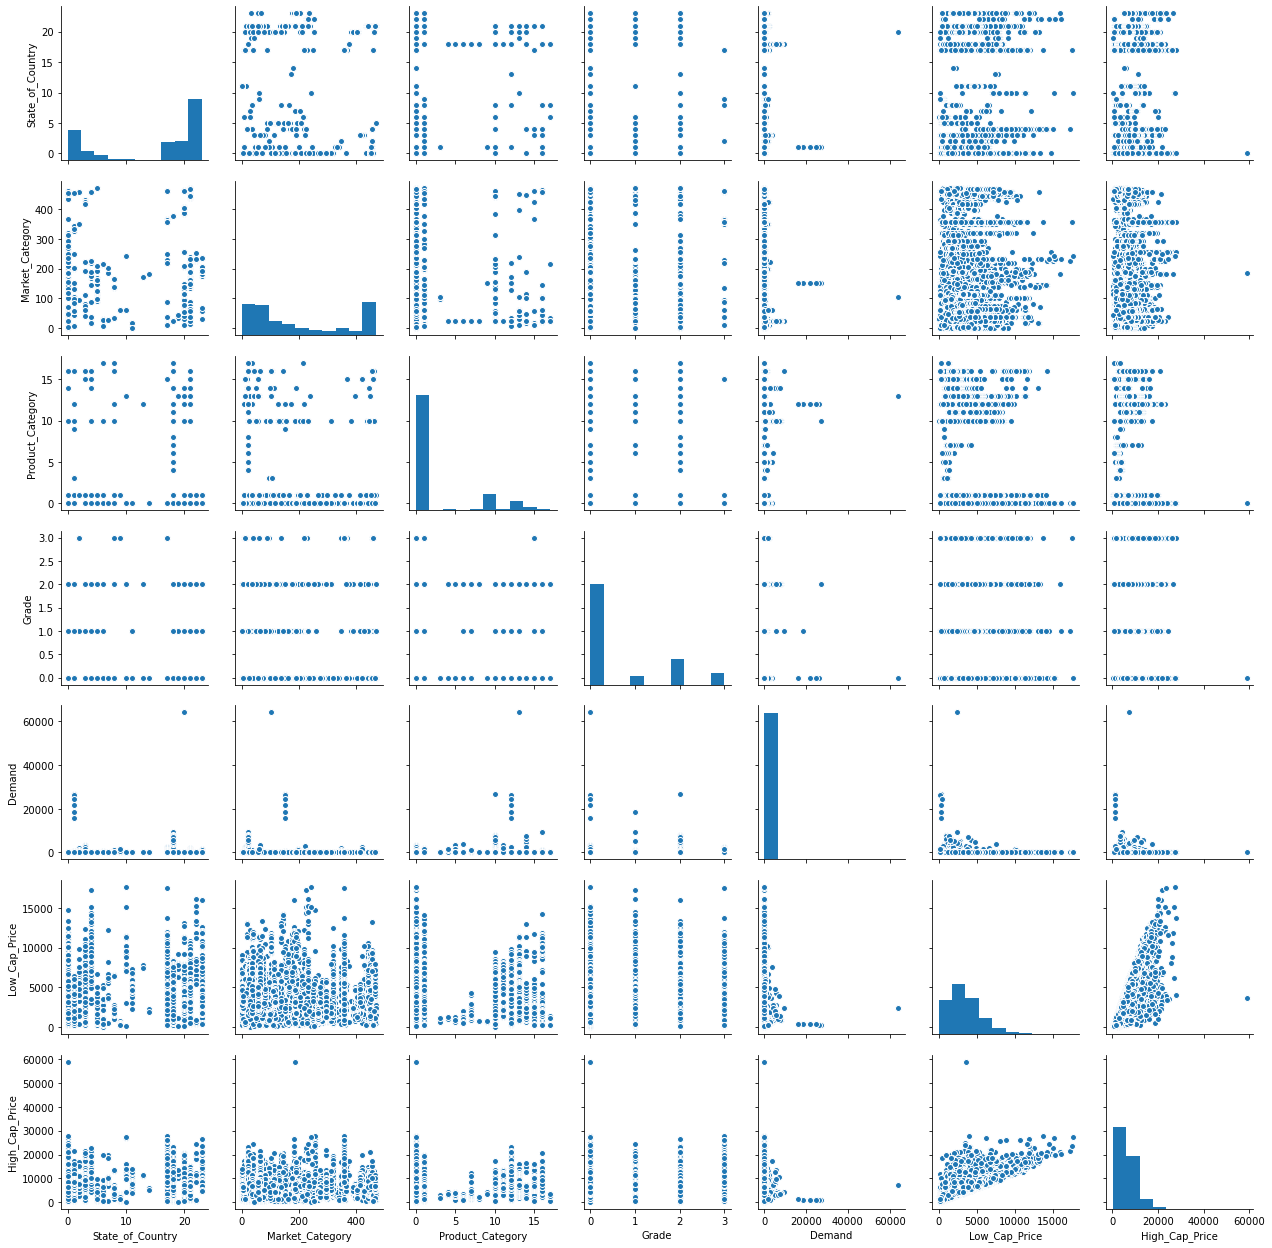

In [45]:
sns.pairplot(data)

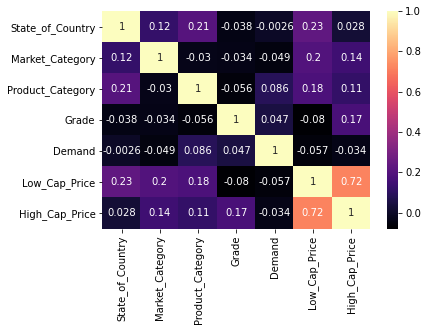

In [48]:
sns.heatmap(data.corr(),annot=True,cmap='magma')

Observations on EDA: 

1. It can be seen that some of the variables are highly skewed which needs to be corrected by applying some transformations which help in reducing the skew.

2. Not much inferences could be made from pair plots as the values are spread across randomly.

3. IT can be seen that variables like high cap price, state of country and market category are highly correlated with the target variable Low cap price.

In [74]:
#Try performing Log trasnformation on features with skewness more than 1
print(data.columns)
mark_sqrt = np.sqrt(data['Market_Category'])
noise = np.random.uniform(0,1,len(data))
mark_log = np.log((data['Market_Category']+noise))
print("skewness before transformation ",data['Market_Category'].skew())
print("skewness after transformation ",mark_sqrt.skew())
print("skewness after LOG transformation ",mark_log.skew())
# print(data['Market_Category'])
# print(mark_sqrt)

Index(['Item_Id', 'Date', 'State_of_Country', 'Market_Category',
       'Product_Category', 'Grade', 'Demand', 'Low_Cap_Price',
       'High_Cap_Price'],
      dtype='object')
skewness before transformation  0.47215763083085166
skewness after transformation  0.053245689668964785
skewness after LOG transformation  -1.129799966129452


In [75]:
grade_sqrt = np.sqrt(data['Grade'])
noise = np.random.uniform(0,1,len(data))
grade_log = np.log((data['Grade']+noise))
print("skewness before transformation ",data['Grade'].skew())
print("skewness after transformation ",grade_sqrt.skew())
print("skewness after log transformation ",grade_log.skew())
# print(data['Grade'])
# print(grade_sqrt)

skewness before transformation  1.1807470235812196
skewness after transformation  0.9207939488172269
skewness after log transformation  -1.1545837974046695


In [76]:
demand_sqrt = np.sqrt(data['Demand'])
noise = np.random.uniform(0,1,len(data))
demand_log = np.log((data['Demand']+noise))
print("skewness before transformation ",data['Demand'].skew())
print("skewness after transformation ",demand_sqrt.skew())
print("skewness after log transformation ",demand_log.skew())

skewness before transformation  43.79019310973429
skewness after transformation  11.01915881952615
skewness after log transformation  0.8623393700176047


In [77]:
lcp_sqrt = np.sqrt(data['Low_Cap_Price'])
noise = np.random.uniform(0,1,len(data))
lcp_log = np.log((data['Low_Cap_Price']+noise))
print("skewness before transformation ",data['Low_Cap_Price'].skew())
print("skewness after transformation ",lcp_sqrt.skew())
print("skewness after log transformation ",lcp_log.skew())

skewness before transformation  1.1767121517327326
skewness after transformation  0.23752078741623928
skewness after log transformation  -0.892852500410727


In [82]:
hcp_sqrt = np.sqrt(data['High_Cap_Price'])
noise = np.random.uniform(0,1,len(data))
hcp_log = np.log((data['High_Cap_Price']+noise))
print("skewness before transformation ",data['High_Cap_Price'].skew())
print("skewness after transformation ",hcp_sqrt.skew())
print("skewness after log transformation ",hcp_log.skew())

skewness before transformation  1.6385116682326013
skewness after transformation  0.5066564820588901
skewness after log transformation  -0.6528298125824515


### Change columns with the skew corrected values ###

In [84]:
Corrected_data = data
Corrected_data['Market_Category'] = mark_sqrt
Corrected_data['Grade'] = grade_sqrt
Corrected_data['Demand'] = demand_log
Corrected_data['Low_Cap_Price'] = lcp_sqrt
Corrected_data['High_Cap_Price'] = hcp_sqrt

print(Corrected_data.head())

  Item_Id        Date  State_of_Country  Market_Category  Product_Category  \
0    IT_1  2007-07-05                 0         0.000000                 0   
1    IT_2  2007-07-05                 0         1.000000                 0   
2    IT_3  2007-07-05                 0        10.148892                 0   
3    IT_4  2007-07-05                 0        10.148892                 0   
4    IT_5  2007-07-05                 0        10.148892                 0   

      Grade    Demand  Low_Cap_Price  High_Cap_Price  
0  0.000000  0.251632      52.773099       65.115282  
1  0.000000 -0.032345      59.782941       68.963759  
2  1.000000  0.870021      77.317527       98.331073  
3  0.000000 -0.991623      75.372409       91.175655  
4  1.414214 -1.333870      70.171219       85.188027  


In [93]:
#Performing the standard train test split of 80-20
y_caps = Corrected_data['Low_Cap_Price'].values
print(y_caps)
# Corrected_data = Corrected_data.drop(['Low_Cap_Price'],axis=1)
print(Corrected_data.loc[:,'State_of_Country':'High_Cap_Price'].head())

[52.77309921 59.78294071 77.31752712 ... 68.70953355 71.28814768
 62.44197306]
   State_of_Country  Market_Category  Product_Category     Grade    Demand  \
0                 0         0.000000                 0  0.000000  0.251632   
1                 0         1.000000                 0  0.000000 -0.032345   
2                 0        10.148892                 0  1.000000  0.870021   
3                 0        10.148892                 0  0.000000 -0.991623   
4                 0        10.148892                 0  1.414214 -1.333870   

   High_Cap_Price  
0       65.115282  
1       68.963759  
2       98.331073  
3       91.175655  
4       85.188027  


In [97]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(Corrected_data.loc[:,'State_of_Country':'High_Cap_Price'], y_caps, test_size=0.1)
print(len(X_train))
print(len(X_test))

8818
980


### Trying various Regression Models in our data ###

In [111]:
Scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train) 
X_train_std = Scaler.transform(X_train)
X_test_std = Scaler.transform(X_test) 

In [128]:
model = DecisionTreeRegressor()

param_grid = {
        'criterion': ['mse', 'friedman_mse', 'mae'],
        'max_depth': [3,6,9,12,15,18]}

model = RandomizedSearchCV(DecisionTreeRegressor(), param_grid, scoring="neg_mean_squared_log_error", cv=5)
model.fit(X_train,y_train)

best_tree = model.best_estimator_

print("The best model obtained from our Randsearch is: ",best)
print("The best parameters obtained by our model is: ",model.best_params_)
print("The Mean sq log error score for our model is is: ",np.round(model.best_score_,3))
    

The best model obtained from our Randsearch is:  DecisionTreeRegressor(criterion='friedman_mse', max_depth=9)
The best parameters obtained by our model is:  {'max_depth': 9, 'criterion': 'mae'}
The Mean sq log error score for our model is is:  -0.028


In [127]:
best_tree.fit(X_train,y_train)
y_pred = best.predict(X_test)
mean_sq_log_error = mean_squared_log_error(y_pred, y_test)
print("The best mean sq log error for our DT regression model is: ",mean_sq_log_error)

The best mean sq log error for our DT regression model is:  0.034427263903751705


In [139]:
#C:\Users\rahul\Desktop\Novartis Challenge\Dataset
test_data = pd.read_csv('C:\\Users\\rahul\\Desktop\\E-comm sale\\Dataset\\Test.csv',encoding='utf-8')

#Correcting skew in test data
grade_sqrt = np.sqrt(test_data['Grade'])
mark_sqrt = np.sqrt(test_data['Market_Category'])
noise = np.random.uniform(0,1,len(test_data))
demand_log = np.log((test_data['Demand']+noise))
hcp_sqrt = np.sqrt(test_data['High_Cap_Price'])

In [138]:
print(test_data.head())

     Item_Id        Date  State_of_Country  Market_Category  Product_Category  \
0  IT_265079  2014-01-19                 0                3                 0   
1  IT_265087  2014-01-19                 0              268                 0   
2  IT_265107  2014-01-19                 0              320                 0   
3  IT_265139  2014-01-19                17              358                 0   
4  IT_265142  2014-01-19                18               23                 5   

   Grade  Demand  High_Cap_Price  
0      0     0.1            5303  
1      2     1.4           10492  
2      0    13.4           24706  
3      3     5.5           23464  
4      2     0.0            6222  


In [140]:
corr_test_data = test_data.loc[:,'State_of_Country':'High_Cap_Price']
corr_test_data['Market_Category'] = mark_sqrt
corr_test_data['Grade'] = grade_sqrt
corr_test_data['Demand'] = demand_log
corr_test_data['High_Cap_Price'] = hcp_sqrt

print(corr_test_data.head())


   State_of_Country  Market_Category  Product_Category     Grade    Demand  \
0                 0         1.732051                 0  0.000000 -0.972411   
1                 0        16.370706                 0  1.414214  0.596880   
2                 0        17.888544                 0  0.000000  2.598891   
3                17        18.920888                 0  1.732051  1.810436   
4                18         4.795832                 5  1.414214 -1.174960   

   High_Cap_Price  
0       72.821700  
1      102.430464  
2      157.181424  
3      153.179633  
4       78.879655  


In [141]:
print(test_data.head())

     Item_Id        Date  State_of_Country  Market_Category  Product_Category  \
0  IT_265079  2014-01-19                 0                3                 0   
1  IT_265087  2014-01-19                 0              268                 0   
2  IT_265107  2014-01-19                 0              320                 0   
3  IT_265139  2014-01-19                17              358                 0   
4  IT_265142  2014-01-19                18               23                 5   

   Grade  Demand  High_Cap_Price  
0      0     0.1            5303  
1      2     1.4           10492  
2      0    13.4           24706  
3      3     5.5           23464  
4      2     0.0            6222  


In [145]:
X_Test = Scaler.transform(corr_test_data)
Y_Pred = best_tree.predict(X_Test)


#Take squares of values as the predicted values of square roots of LCP
Y_Pred = Y_Pred ** 2
Y_Pred = Y_Pred.tolist()

results = test_data[['Item_Id']]
print(type(results))

results['Low_Cap_Price'] = Y_Pred 
#How our final submission files look like!
print(results.head())
print(results.tail())
results.to_csv("Results_DT.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
     Item_Id  Low_Cap_Price
0  IT_265079          132.0
1  IT_265087          124.0
2  IT_265107          124.0
3  IT_265139          124.0
4  IT_265142          132.0
        Item_Id  Low_Cap_Price
5758  IT_361691          124.0
5759  IT_361694          124.0
5760  IT_361699          132.0
5761  IT_361719          124.0
5762  IT_361723          124.0


### Try powerful models like XGB and RF ###

In [150]:
#try Random Forest with 5 fold validation

depth_grid_list = [3,6,9,12,15]
estimators_grid_list =  [25,50,100,150]
oob_bool = [True,False]
criterion = ['mse','mae']
tuned_parameters = [{'max_depth': depth_grid_list, 'n_estimators': estimators_grid_list,'oob_score': oob_bool,'criterion': criterion}]
model = GridSearchCV(RandomForestRegressor(), tuned_parameters, scoring = 'neg_mean_squared_log_error',n_jobs=-1, cv=5,return_train_score = True)
model.fit(X_train,y_train)

best_rf = model.best_estimator_
print("The best model obtained from our Gridsearch is: ",best_rf)
print("The best parameters obtained by our model is: ",model.best_params_)
print("The mean sq log loss score for our model is is: ",np.round(model.best_score_,3))


The best model obtained from our Gridsearch is:  RandomForestRegressor(max_depth=12, oob_score=True)
The best parameters obtained by our model is:  {'criterion': 'mse', 'max_depth': 12, 'n_estimators': 100, 'oob_score': True}
The mean sq log loss score for our model is is:  -0.019


In [151]:
best_rf.fit(X_train,y_train)
y_pred = best_rf.predict(X_test)
mean_sq_log_error = mean_squared_log_error(y_pred, y_test)
print("The best mean sq log error for our DT regression model is: ",mean_sq_log_error)

The best mean sq log error for our DT regression model is:  0.02505599793764276


In [193]:
X_Test = corr_test_data
Y_Pred = best_rf.predict(corr_test_data)


#Take squares of values as the predicted values of square roots of LCP
Y_Pred = Y_Pred ** 2
Y_Pred = Y_Pred.tolist()

results = test_data[['Item_Id']]
print(type(results))

results['Low_Cap_Price'] = Y_Pred 
#How our final submission files look like!
print(results.head())

results.to_csv("Results_RF.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
     Item_Id  Low_Cap_Price
0  IT_265079    3247.830525
1  IT_265087    2150.287554
2  IT_265107    5216.245678
3  IT_265139    6780.363454
4  IT_265142    1714.431711


In [157]:
params = {  
"n_estimators": st.randint(5, 100),
"max_depth": st.randint(2, 25),
"learning_rate": st.uniform(0, 0.25),
"gamma": st.uniform(0,5)}

model = RandomizedSearchCV(XGBRegressor(), params, scoring = 'neg_mean_squared_log_error',n_jobs=-1, cv=5,return_train_score = True)
model.fit(X_train,y_train)

best_gbdt = model.best_estimator_
print("The best model obtained from our Gridsearch is: ",best_gbdt)
print("The best parameters obtained by our model is: ",model.best_params_)
print("The AUC score for our model is is: ",np.round(model.best_score_,3))



The best model obtained from our Gridsearch is:  XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.8640549503523336,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.09561592845657885, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=55, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)
The best parameters obtained by our model is:  {'gamma': 1.8640549503523336, 'learning_rate': 0.09561592845657885, 'max_depth': 7, 'n_estimators': 55}
The AUC score for our model is is:  -0.018


In [158]:
best_gbdt.fit(X_train,y_train)
y_pred = best_gbdt.predict(X_test)
mean_sq_log_error = mean_squared_log_error(y_pred, y_test)
print("The best mean sq log error for our DT regression model is: ",mean_sq_log_error)

The best mean sq log error for our DT regression model is:  0.025152630345467893


In [194]:
X_Test = corr_test_data
Y_Pred = best_gbdt.predict(corr_test_data)


#Take squares of values as the predicted values of square roots of LCP
Y_Pred = Y_Pred ** 2
Y_Pred = Y_Pred.tolist()

results = test_data[['Item_Id']]
print(type(results))

results['Low_Cap_Price'] = Y_Pred 
#How our final submission files look like!
print(results.head())

results.to_csv("Results_GBDT.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
     Item_Id  Low_Cap_Price
0  IT_265079    3181.389648
1  IT_265087    1933.546509
2  IT_265107    2435.653809
3  IT_265139    7574.019043
4  IT_265142    2332.096680


### Try Linear models on data ###

In [181]:
alpha_grid_list = [10**-4,10**-3,10**-2,10**-1,1,10**2,10**3,10**4,10**5]
pen_list = ['l1','l2','elasticnet']
l1_ratio = [0,.25,.5,.75,1]
tuned_parameters = [{'alpha': alpha_grid_list,'penalty': pen_list,'l1_ratio': l1_ratio}]
model = GridSearchCV(SGDRegressor(), tuned_parameters, scoring = 'neg_mean_squared_error',n_jobs=-1, cv=5)
model.fit(X_train_std,y_train)

best_lrplane = model.best_estimator_
print("The best model obtained from our Gridsearch is: ",best_plane)
print("The best parameters obtained by our model is: ",model.best_params_)
print("The mean sq log loss score for our model is is: ",np.round(model.best_score_,3))


The best model obtained from our Gridsearch is:  Ridge(alpha=0.001, solver='saga')
The best parameters obtained by our model is:  {'alpha': 0.001, 'l1_ratio': 0.5, 'penalty': 'elasticnet'}
The mean sq log loss score for our model is is:  -110.903


In [182]:
best_lrplane.fit(X_train_std,y_train)
y_pred = best_lrplane.predict(X_test_std)
mean_sq_log_error = mean_squared_log_error(y_pred, y_test)
print("The best mean sq log error for our DT regression model is: ",mean_sq_log_error)

The best mean sq log error for our DT regression model is:  0.051335432133886263


In [183]:
X_Test = corr_test_data
X_Test_std = Scaler.transform(X_Test)
Y_Pred = best_lrplane.predict(X_Test_std)


#Take squares of values as the predicted values of square roots of LCP
Y_Pred = Y_Pred ** 2
Y_Pred = Y_Pred.tolist()

results = test_data[['Item_Id']]
print(type(results))

results['Low_Cap_Price'] = Y_Pred 
#How our final submission files look like!
print(results.head())

results.to_csv("Results_SGDreg.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
     Item_Id  Low_Cap_Price
0  IT_265079    2550.175359
1  IT_265087    3832.752209
2  IT_265107   10421.108427
3  IT_265139    9791.986381
4  IT_265142    3155.363264


In [184]:
alpha_grid_list = [10**-4,10**-3,10**-2,10**-1,1,10**2,10**3,10**4,10**5]
pen_list = ['l1','l2','elasticnet']
l1_ratio = [0,.25,.5,.75,1]
tuned_parameters = [{'alpha': alpha_grid_list,'penalty': pen_list,'l1_ratio': l1_ratio}]
model = GridSearchCV(SGDRegressor(), tuned_parameters, scoring = 'neg_mean_squared_error',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

best_lrplane = model.best_estimator_
print("The best model obtained from our Gridsearch is: ",best_lrplane)
print("The best parameters obtained by our model is: ",model.best_params_)
print("The mean sq log loss score for our model is is: ",np.round(model.best_score_,3))


The best model obtained from our Gridsearch is:  Ridge(alpha=0.001, solver='saga')
The best parameters obtained by our model is:  {'alpha': 100000, 'l1_ratio': 0, 'penalty': 'l1'}
The mean sq log loss score for our model is is:  -336.674


In [185]:
best_lrplane.fit(X_train,y_train)
y_pred = best_lrplane.predict(X_test)
mean_sq_log_error = mean_squared_log_error(y_pred, y_test)
print("The best mean sq log error for our DT regression model is: ",mean_sq_log_error)

The best mean sq log error for our DT regression model is:  0.12847856129102847


In [186]:
X_Test = corr_test_data
# X_Test_std = Scaler.transform(X_Test)
Y_Pred = best_lrplane.predict(X_Test)


#Take squares of values as the predicted values of square roots of LCP
Y_Pred = Y_Pred ** 2
Y_Pred = Y_Pred.tolist()

results = test_data[['Item_Id']]
print(type(results))

results['Low_Cap_Price'] = Y_Pred 
#How our final submission files look like!
print(results.head())

results.to_csv("Results_SGDreg.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
     Item_Id  Low_Cap_Price
0  IT_265079    3186.312443
1  IT_265087    3186.312443
2  IT_265107    3186.312443
3  IT_265139    3186.312443
4  IT_265142    3186.312443


In [195]:
alpha_grid_list = [10**-4,10**-3,10**-2,10**-1,1,10**2,10**3,10**4]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
tuned_parameters = [{'alpha': alpha_grid_list,'solver': solver}]
model = GridSearchCV(Ridge(), tuned_parameters, scoring = 'neg_mean_squared_error',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

best_riplane = model.best_estimator_
print("The best model obtained from our Gridsearch is: ",best_riplane)
print("The best parameters obtained by our model is: ",model.best_params_)
print("The mean sq log loss score for our model is is: ",np.round(model.best_score_,3))


The best model obtained from our Gridsearch is:  Ridge(alpha=0.001, solver='saga')
The best parameters obtained by our model is:  {'alpha': 0.001, 'solver': 'saga'}
The mean sq log loss score for our model is is:  -110.953


In [196]:
best_riplane.fit(X_train,y_train)
y_pred = best_riplane.predict(X_test)
mean_sq_log_error = mean_squared_log_error(y_pred, y_test)
print("The best mean sq log error for our Ridge regression model is: ",mean_sq_log_error)

The best mean sq log error for our Ridge regression model is:  0.05087543472267424


In [197]:
Y_Pred = best_riplane.predict(corr_test_data)


#Take squares of values as the predicted values of square roots of LCP
Y_Pred = Y_Pred ** 2
Y_Pred = Y_Pred.tolist()

results = test_data[['Item_Id']]
print(type(results))

results['Low_Cap_Price'] = Y_Pred 
#How our final submission files look like!
print(results.head())

results.to_csv("Results_Ridge.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
     Item_Id  Low_Cap_Price
0  IT_265079    2456.485261
1  IT_265087    3856.578911
2  IT_265107   10370.749100
3  IT_265139    9913.184877
4  IT_265142    3144.185147


In [198]:
alpha_grid_list = [10**-4,10**-3,10**-2,10**-1,1,10**2,10**3,10**4]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
tuned_parameters = [{'alpha': alpha_grid_list,'solver': solver}]
model = GridSearchCV(Ridge(), tuned_parameters, scoring = 'neg_mean_squared_error',n_jobs=-1, cv=5)
model.fit(X_train_std,y_train)

best_riplane = model.best_estimator_
print("The best model obtained from our Gridsearch is: ",best_riplane)
print("The best parameters obtained by our model is: ",model.best_params_)
print("The mean sq log loss score for our model is is: ",np.round(model.best_score_,3))


The best model obtained from our Gridsearch is:  Ridge(alpha=1, solver='saga')
The best parameters obtained by our model is:  {'alpha': 1, 'solver': 'saga'}
The mean sq log loss score for our model is is:  -110.952


In [199]:
best_riplane.fit(X_train_std,y_train)
y_pred = best_riplane.predict(X_test_std)
mean_sq_log_error = mean_squared_log_error(y_pred, y_test)
print("The best mean sq log error for our Ridge regression model is: ",mean_sq_log_error)

The best mean sq log error for our Ridge regression model is:  0.05088426761711236


In [200]:
Y_Pred = best_riplane.predict(X_Test_std)


#Take squares of values as the predicted values of square roots of LCP
Y_Pred = Y_Pred ** 2
Y_Pred = Y_Pred.tolist()

results = test_data[['Item_Id']]
print(type(results))

results['Low_Cap_Price'] = Y_Pred 
#How our final submission files look like!
print(results.head())

results.to_csv("Results_Ridgestd.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
     Item_Id  Low_Cap_Price
0  IT_265079    2457.480123
1  IT_265087    3854.982311
2  IT_265107   10373.907045
3  IT_265139    9909.867570
4  IT_265142    3142.139961


### Summary: ###

    1. The problem was to find the optimum price that has to be put out by a e-comm company during a sale. The challenge was presented by HackerEarth
    2. During EDA, we found that few variables were highly skewed and employed techniques such as log and square root transforms to handle them.
    3. We started with simpler tehcniques such as Decision Tree regressor, Generalized linear regression models and ensemble models.
    4. We were able to get the best score of 99.83 for the predictions made using the Random Forest Model